## DATA MINING FINAL PROJECT
##### TEAM 01
###### SUBMITTED BY: PON SWARNALAYA RAVICHANDRAN

###### IMPORTING NECESSARY LIBRARIES

In [2]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
#%load_ext line_profiler
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


IMPORTING MERF PACKAGES

In [3]:
from merf.utils import MERFDataGenerator
from merf.merf import MERF
from merf.viz import plot_merf_training_stats #last plotting used

In [4]:
from scipy import stats

In [5]:
# sklearn and subpackages
import sklearn as skl
from sklearn import model_selection as mdl_slct
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV

In [6]:
import pandas as pd
import wbgapi as wb

LISTING OUT THE COUNTRIES

In [7]:
countries = ["Albania", "Argentina", "Armenia", "Australia", 
             "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", 
             "Bulgaria", "Canada", "Chile", "China", "Croatia", "Cyprus",  
             "Czech Republic", "Denmark", "Estonia", "Finland","France", "Georgia", 
             "Germany", "Greece", "Hungary", "Iceland", "India",  "Ireland", "Israel",  
             "Italy", "Japan", "Kazakhstan", "Korea, Rep.",   "Latvia",   "Lithuania", 
             "Luxembourg", "Mexico", "Moldova", "Montenegro","Netherlands", "North Macedonia", 
             "Norway", "Poland", "Portugal", "Romania", "Russian Federation", "Serbia", "Singapore", 
             "Slovak Republic", "Slovenia", "South Africa", "Spain", "Sweden",  "Switzerland", "Turkey", 
             "Turkiye", "Ukraine", "United Kingdom", "United States"]


In [8]:
countries = [wb.economy.coder(country) for country in countries]

In [9]:
country_list = list(wb.economy.coder(countries).values())
country_set = set(country_list)
country_set

{'ALB',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BEL',
 'BGR',
 'BIH',
 'BLR',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'GBR',
 'GEO',
 'GRC',
 'HRV',
 'HUN',
 'IND',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JPN',
 'KAZ',
 'KOR',
 'LTU',
 'LUX',
 'LVA',
 'MDA',
 'MEX',
 'MKD',
 'MNE',
 'NLD',
 'NOR',
 'POL',
 'PRT',
 'ROU',
 'RUS',
 'SGP',
 'SRB',
 'SVK',
 'SVN',
 'SWE',
 'TUR',
 'UKR',
 'USA',
 'ZAF'}

Measure of interest

In [10]:
indexes = ['EN.ATM.CO2E.KT', 'NY.GDP.MKTP.PP.KD','SP.POP.TOTL', 'GB.XPD.RSDV.GD.ZS',
 'EG.FEC.RNEW.ZS', 'SP.URB.TOTL.IN.ZS', 'NV.MNF.TECH.ZS.UN', 'NE.TRD.GNFS.ZS']

In [11]:
# import the data from the API
# URL of API package: https://pypi.org/project/wbgapi/
WBdf = wb.data.DataFrame(series = indexes, economy = countries, time = range(1994,2023), labels=True,columns='series')# years of interest
year_list = range(1994, 2022)
WBdf

Country  Time  EG.FEC.RNEW.ZS  EN.ATM.CO2E.KT  \
economy time                                                          
USA     YR2021  United States  2021             NaN             NaN   
        YR2020  United States  2020             NaN             NaN   
        YR2019  United States  2019       10.420000    4.817720e+06   
        YR2018  United States  2018       10.120000    4.975310e+06   
        YR2017  United States  2017        9.920000    4.819370e+06   
...                       ...   ...             ...             ...   
ALB     YR1998        Albania  1998       49.983365    1.790000e+03   
        YR1997        Albania  1997       55.953349    1.470000e+03   
        YR1996        Albania  1996       51.636361    1.940000e+03   
        YR1995        Albania  1995       50.609710    1.930000e+03   
        YR1994        Albania  1994       51.459544    2.070000e+03   

                GB.XPD.RSDV.GD.ZS  NE.TRD.GNFS.ZS  NV.MNF.TECH.ZS.UN  \
economy time                                                           
USA     YR2021                NaN             NaN                NaN   
        YR2020            3.45018       23.442457                NaN   
        YR2019            3.16609       26.368922          47.054393   
        YR2018            3.00082       27.588858          47.833288   
        YR2017            2.89572       27.246163          48.313753   
...                           ...             ...                ...   
ALB     YR1998                NaN       48.137535           5.119037   
        YR1997                NaN       45.425556           2.013606   
        YR1996                NaN       44.895445           1.843789   
        YR1995                NaN       47.610595           8.072769   
        YR1994                NaN       53.102585           5.902944   

                NY.GDP.MKTP.PP.KD  SP.POP.TOTL  SP.URB.TOTL.IN.ZS  
economy time                                                       
USA     YR2021       2.093228e+13  331893745.0             82.873  
        YR2020       1.980890e+13  331501080.0             82.664  
        YR2019       2.050708e+13  328329953.0             82.459  
        YR2018       2.004820e+13  326838199.0             82.256  
        YR2017       1.947962e+13  325122128.0             82.058  
...                           ...          ...                ...  
ALB     YR1998       1.507662e+10    3128530.0             40.601  
        YR1997       1.385344e+10    3148281.0             40.035  
        YR1996       1.555168e+10    3168033.0             39.473  
        YR1995       1.425452e+10    3187784.0             38.911  
        YR1994       1.257874e+10    3207536.0             38.354  

[1596 rows x 10 columns]

In [12]:
WBdf.unstack(0).stack()

Country  Time  EG.FEC.RNEW.ZS  EN.ATM.CO2E.KT  \
time   economy                                                         
YR2021 USA       United States  2021             NaN             NaN   
       GBR      United Kingdom  2021             NaN             NaN   
       UKR             Ukraine  2021             NaN             NaN   
       TUR             Turkiye  2021             NaN             NaN   
       CHE         Switzerland  2021             NaN             NaN   
...                        ...   ...             ...             ...   
YR1994 AUT             Austria  1994       25.679455         58280.0   
       AUS           Australia  1994        8.259947        280180.0   
       ARM             Armenia  1994       17.763653          2740.0   
       ARG           Argentina  1994       10.734909        111910.0   
       ALB             Albania  1994       51.459544          2070.0   

                GB.XPD.RSDV.GD.ZS  NE.TRD.GNFS.ZS  NV.MNF.TECH.ZS.UN  \
time   economy                                                         
YR2021 USA                    NaN             NaN                NaN   
       GBR                    NaN       55.236304                NaN   
       UKR                    NaN       82.621300                NaN   
       TUR                    NaN       71.212724                NaN   
       CHE                    NaN      125.106281                NaN   
...                           ...             ...                ...   
YR1994 AUT                    NaN       65.987093          36.610757   
       AUS                    NaN       36.458731          27.756124   
       ARM                    NaN      112.429365          28.824233   
       ARG                    NaN       18.134346          29.628354   
       ALB                    NaN       53.102585           5.902944   

                NY.GDP.MKTP.PP.KD  SP.POP.TOTL  SP.URB.TOTL.IN.ZS  
time   economy                                                     
YR2021 USA           2.093228e+13  331893745.0             82.873  
       GBR           3.086193e+12   67326569.0             84.152  
       UKR           5.355789e+11   43814581.0             69.757  
       TUR           2.657762e+12   85042736.0             76.569  
       CHE           6.157349e+11    8697723.0             73.996  
...                           ...          ...                ...  
YR1994 AUT           3.129625e+11    7936118.0             61.870  
       AUS           5.726639e+11   17855000.0             85.028  
       ARM           9.053823e+09    3283664.0             66.332  
       ARG           6.224138e+11   34402669.0             87.960  
       ALB           1.257874e+10    3207536.0             38.354  

[1596 rows x 10 columns]

RENAMING THE COLUMNS TO MAKE THEM MORE EASILY ACCESSIBLE

In [13]:
# renaming the columns to make them more comprehensible
WBdf = WBdf.rename({'EG.FEC.RNEW.ZS': 'Renewable energy consumption',
'EN.ATM.CO2E.KT': 'CO2 emissions',
'GB.XPD.RSDV.GD.ZS': 'Research and Development expenditure',
'NE.TRD.GNFS.ZS': 'Trade (% of GDP)',
'NV.MNF.TECH.ZS.UN': 'Perc Manufacturing Value Added',
'NY.GDP.MKTP.PP.KD': 'GDP per capita',
'SP.POP.TOTL': 'Total Population',
'SP.URB.TOTL.IN.ZS': 'Urban Population',
},axis = 1)
WBdf

Country  Time  Renewable energy consumption  \
economy time                                                        
USA     YR2021  United States  2021                           NaN   
        YR2020  United States  2020                           NaN   
        YR2019  United States  2019                     10.420000   
        YR2018  United States  2018                     10.120000   
        YR2017  United States  2017                      9.920000   
...                       ...   ...                           ...   
ALB     YR1998        Albania  1998                     49.983365   
        YR1997        Albania  1997                     55.953349   
        YR1996        Albania  1996                     51.636361   
        YR1995        Albania  1995                     50.609710   
        YR1994        Albania  1994                     51.459544   

                CO2 emissions  Research and Development expenditure  \
economy time                                                          
USA     YR2021            NaN                                   NaN   
        YR2020            NaN                               3.45018   
        YR2019   4.817720e+06                               3.16609   
        YR2018   4.975310e+06                               3.00082   
        YR2017   4.819370e+06                               2.89572   
...                       ...                                   ...   
ALB     YR1998   1.790000e+03                                   NaN   
        YR1997   1.470000e+03                                   NaN   
        YR1996   1.940000e+03                                   NaN   
        YR1995   1.930000e+03                                   NaN   
        YR1994   2.070000e+03                                   NaN   

                Trade (% of GDP)  Perc Manufacturing Value Added  \
economy time                                                       
USA     YR2021               NaN                             NaN   
        YR2020         23.442457                             NaN   
        YR2019         26.368922                       47.054393   
        YR2018         27.588858                       47.833288   
        YR2017         27.246163                       48.313753   
...                          ...                             ...   
ALB     YR1998         48.137535                        5.119037   
        YR1997         45.425556                        2.013606   
        YR1996         44.895445                        1.843789   
        YR1995         47.610595                        8.072769   
        YR1994         53.102585                        5.902944   

                GDP per capita  Total Population  Urban Population  
economy time                                                        
USA     YR2021    2.093228e+13       331893745.0            82.873  
        YR2020    1.980890e+13       331501080.0            82.664  
        YR2019    2.050708e+13       328329953.0            82.459  
        YR2018    2.004820e+13       326838199.0            82.256  
        YR2017    1.947962e+13       325122128.0            82.058  
...                        ...               ...               ...  
ALB     YR1998    1.507662e+10         3128530.0            40.601  
        YR1997    1.385344e+10         3148281.0            40.035  
        YR1996    1.555168e+10         3168033.0            39.473  
        YR1995    1.425452e+10         3187784.0            38.911  
        YR1994    1.257874e+10         3207536.0            38.354  

[1596 rows x 10 columns]

In [14]:
ds1= WBdf.set_index(['Country','Time']).isnull().sum(level=0)
ds1

,Renewable energy consumption,CO2 emissions,Research and Development expenditure,Trade (% of GDP),Perc Manufacturing Value Added,GDP per capita,Total Population,Urban Population
Country,,,,,,,,
United States,2,2,3,1,2,0,0,0
United Kingdom,2,2,4,0,2,0,0,0
Ukraine,2,2,4,0,2,0,0,0
Turkiye,2,2,3,0,2,0,0,0
Switzerland,2,2,20,0,2,0,0,0
Sweden,2,2,7,0,2,0,0,0
Spain,2,2,3,0,2,0,0,0
South Africa,2,2,9,0,2,0,0,0
Slovenia,2,2,3,1,2,1,0,0


In [15]:
Alp = WBdf.iloc[: , :-2]
Alp = Alp.fillna(WBdf.median())
Alp


Country  Time  Renewable energy consumption  \
economy time                                                        
USA     YR2021  United States  2021                     11.900000   
        YR2020  United States  2020                     11.900000   
        YR2019  United States  2019                     10.420000   
        YR2018  United States  2018                     10.120000   
        YR2017  United States  2017                      9.920000   
...                       ...   ...                           ...   
ALB     YR1998        Albania  1998                     49.983365   
        YR1997        Albania  1997                     55.953349   
        YR1996        Albania  1996                     51.636361   
        YR1995        Albania  1995                     50.609710   
        YR1994        Albania  1994                     51.459544   

                CO2 emissions  Research and Development expenditure  \
economy time                                                          
USA     YR2021   5.872500e+04                               1.06429   
        YR2020   5.872500e+04                               3.45018   
        YR2019   4.817720e+06                               3.16609   
        YR2018   4.975310e+06                               3.00082   
        YR2017   4.819370e+06                               2.89572   
...                       ...                                   ...   
ALB     YR1998   1.790000e+03                               1.06429   
        YR1997   1.470000e+03                               1.06429   
        YR1996   1.940000e+03                               1.06429   
        YR1995   1.930000e+03                               1.06429   
        YR1994   2.070000e+03                               1.06429   

                Trade (% of GDP)  Perc Manufacturing Value Added  \
economy time                                                       
USA     YR2021         78.511459                       34.206908   
        YR2020         23.442457                       34.206908   
        YR2019         26.368922                       47.054393   
        YR2018         27.588858                       47.833288   
        YR2017         27.246163                       48.313753   
...                          ...                             ...   
ALB     YR1998         48.137535                        5.119037   
        YR1997         45.425556                        2.013606   
        YR1996         44.895445                        1.843789   
        YR1995         47.610595                        8.072769   
        YR1994         53.102585                        5.902944   

                GDP per capita  
economy time                    
USA     YR2021    2.093228e+13  
        YR2020    1.980890e+13  
        YR2019    2.050708e+13  
        YR2018    2.004820e+13  
        YR2017    1.947962e+13  
...                        ...  
ALB     YR1998    1.507662e+10  
        YR1997    1.385344e+10  
        YR1996    1.555168e+10  
        YR1995    1.425452e+10  
        YR1994    1.257874e+10  

[1596 rows x 8 columns]

### Outlier detection and Treatment:

In [16]:
def outlier_treatment(WBdf):
    # outliers more than three sds away are replaced with the mean value of the column
    outlier_summary = []

    for col in WBdf.columns[2:]:
        outliers = WBdf[(np.abs(stats.zscore(WBdf[col]))>3)][col]
        outlier_summary.append([col, len(outliers)])
        WBdf.loc[outliers.index, col] = WBdf[col].mean()

    outlier_summary = pd.DataFrame(outlier_summary, columns=['Variables', 'No. of Outliers'])

    return WBdf, outlier_summary

# run function
WBdf_no_outliers = WBdf.copy()
WBdf_no_outliers, outlier_summary = outlier_treatment(WBdf_no_outliers)

outlier_summary

,Variables,No. of Outliers
0,Renewable energy consumption,0
1,CO2 emissions,0
2,Research and Development expenditure,0
3,Trade (% of GDP),0
4,Perc Manufacturing Value Added,0
5,GDP per capita,0
6,Total Population,56
7,Urban Population,0


### CALCULATING CO2 PER CAPITA:

In [17]:
WBdf['CO2 per Capita'] = WBdf['CO2 emissions']/ WBdf['Total Population']

### LOG TRANSFORMATION OF THE GIVEN DATA:

In [18]:
# log base 10 transform the data
MainData = WBdf_no_outliers.copy()
for col in [col for col in MainData.columns[2:]]:
    MainData[col] = np.log10(MainData[col] + 1)

In [19]:
MainData = WBdf.copy()

In [20]:
MainData.describe(include='all')

,Country,Time,Renewable energy consumption,CO2 emissions,Research and Development expenditure,Trade (% of GDP),Perc Manufacturing Value Added,GDP per capita,Total Population,Urban Population,CO2 per Capita
count,1596,1596,1471.000000,1.482000e+03,1285.000000,1578.000000,1482.000000,1.581000e+03,1.596000e+03,1596.000000,1482.000000
unique,57,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.964698,4.101669e+05,1.361463,92.291453,34.486891,1.256346e+12,7.187647e+07,69.966665,0.007248
std,NaN,NaN,15.156782,1.184270e+06,1.006685,58.492546,16.301878,2.890133e+12,2.311666e+08,15.039729,0.004151
min,NaN,NaN,0.330000,1.210000e+03,0.015900,13.388233,1.843789,6.508747e+09,2.660210e+05,26.399000,0.000467
25%,NaN,NaN,5.703817,1.971000e+04,0.549500,57.201579,22.073197,7.596175e+10,3.973567e+06,57.942000,0.004161
50%,NaN,NaN,11.900000,5.872500e+04,1.064290,78.511459,34.206908,3.213123e+11,9.828526e+06,69.938000,0.006550
75%,NaN,NaN,24.053439,3.176000e+05,2.007640,109.937863,45.771268,1.013995e+12,4.468894e+07,81.123500,0.009170


### CHECKING FOR MISSING VALUES:

In [21]:
MainData.isna().sum()

Country                                   0
Time                                      0
Renewable energy consumption            125
CO2 emissions                           114
Research and Development expenditure    311
Trade (% of GDP)                         18
Perc Manufacturing Value Added          114
GDP per capita                           15
Total Population                          0
Urban Population                          0
CO2 per Capita                          114
dtype: int64

### FILLING THE MISSING VALUES WITH THE MEDIAN OF WHOLE DATASET:

In [22]:
MainData= MainData.fillna(MainData.median())
MainData.isna().sum()

Country                                 0
Time                                    0
Renewable energy consumption            0
CO2 emissions                           0
Research and Development expenditure    0
Trade (% of GDP)                        0
Perc Manufacturing Value Added          0
GDP per capita                          0
Total Population                        0
Urban Population                        0
CO2 per Capita                          0
dtype: int64

### EXPLORATORY DATA ANALYSIS



###### Data Summary: ####

In [23]:
MainData.describe(include='all')

,Country,Time,Renewable energy consumption,CO2 emissions,Research and Development expenditure,Trade (% of GDP),Perc Manufacturing Value Added,GDP per capita,Total Population,Urban Population,CO2 per Capita
count,1596,1596,1596.000000,1.596000e+03,1596.000000,1596.000000,1596.000000,1.596000e+03,1.596000e+03,1596.000000,1596.000000
unique,57,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.568027,3.850640e+05,1.303555,92.136039,34.466892,1.247558e+12,7.187647e+07,69.966665,0.007198
std,NaN,NaN,14.614278,1.144749e+06,0.910867,58.179769,15.708669,2.877926e+12,2.311666e+08,15.039729,0.004004
min,NaN,NaN,0.330000,1.210000e+03,0.015900,13.388233,1.843789,6.508747e+09,2.660210e+05,26.399000,0.000467
25%,NaN,NaN,6.307500,2.754250e+04,0.659170,57.527074,23.516387,7.868958e+10,3.973567e+06,57.942000,0.004342
50%,NaN,NaN,11.900000,5.872500e+04,1.064290,78.511459,34.206908,3.213123e+11,9.828526e+06,69.938000,0.006550
75%,NaN,NaN,22.434181,3.005275e+05,1.742292,109.120191,44.673279,1.007629e+12,4.468894e+07,81.123500,0.008976


KeyError: 8

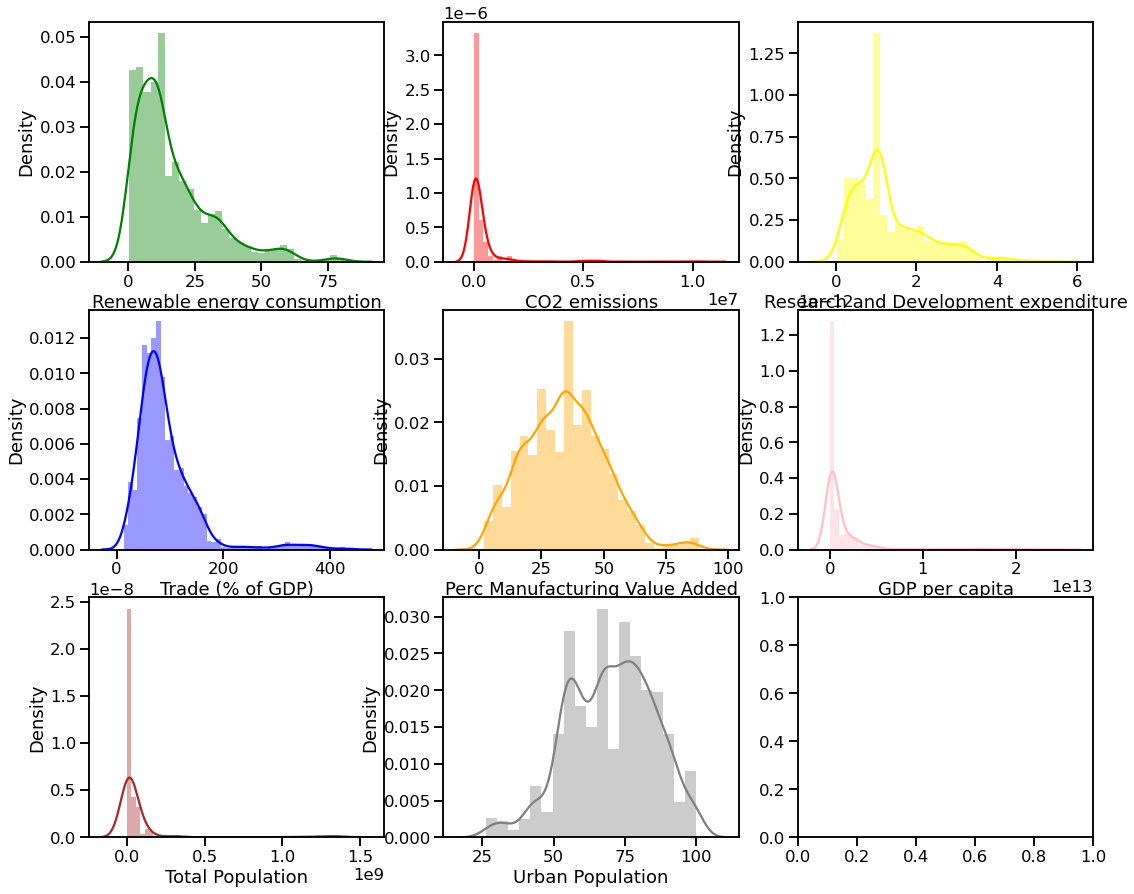

In [62]:
# plot histograms of all six variables with smoothed approximate distribution
%matplotlib inline
import seaborn as seas

n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (18,15))

colors = {0:'green',1:'red',2:'yellow',3:'blue',4:'orange',5:'pink',6:'brown',7:'gray'}

for i, column in enumerate(MainData.columns[2:]):
     seas.distplot(MainData[column],color= colors[i],ax=axes[i//n_cols,i%n_cols])

#### PAIR PLOTS FOR COUNTRY AND TIME INORDER TO FIND THE RELATIONS BETWEEN DATA AND THE VARIABLES:

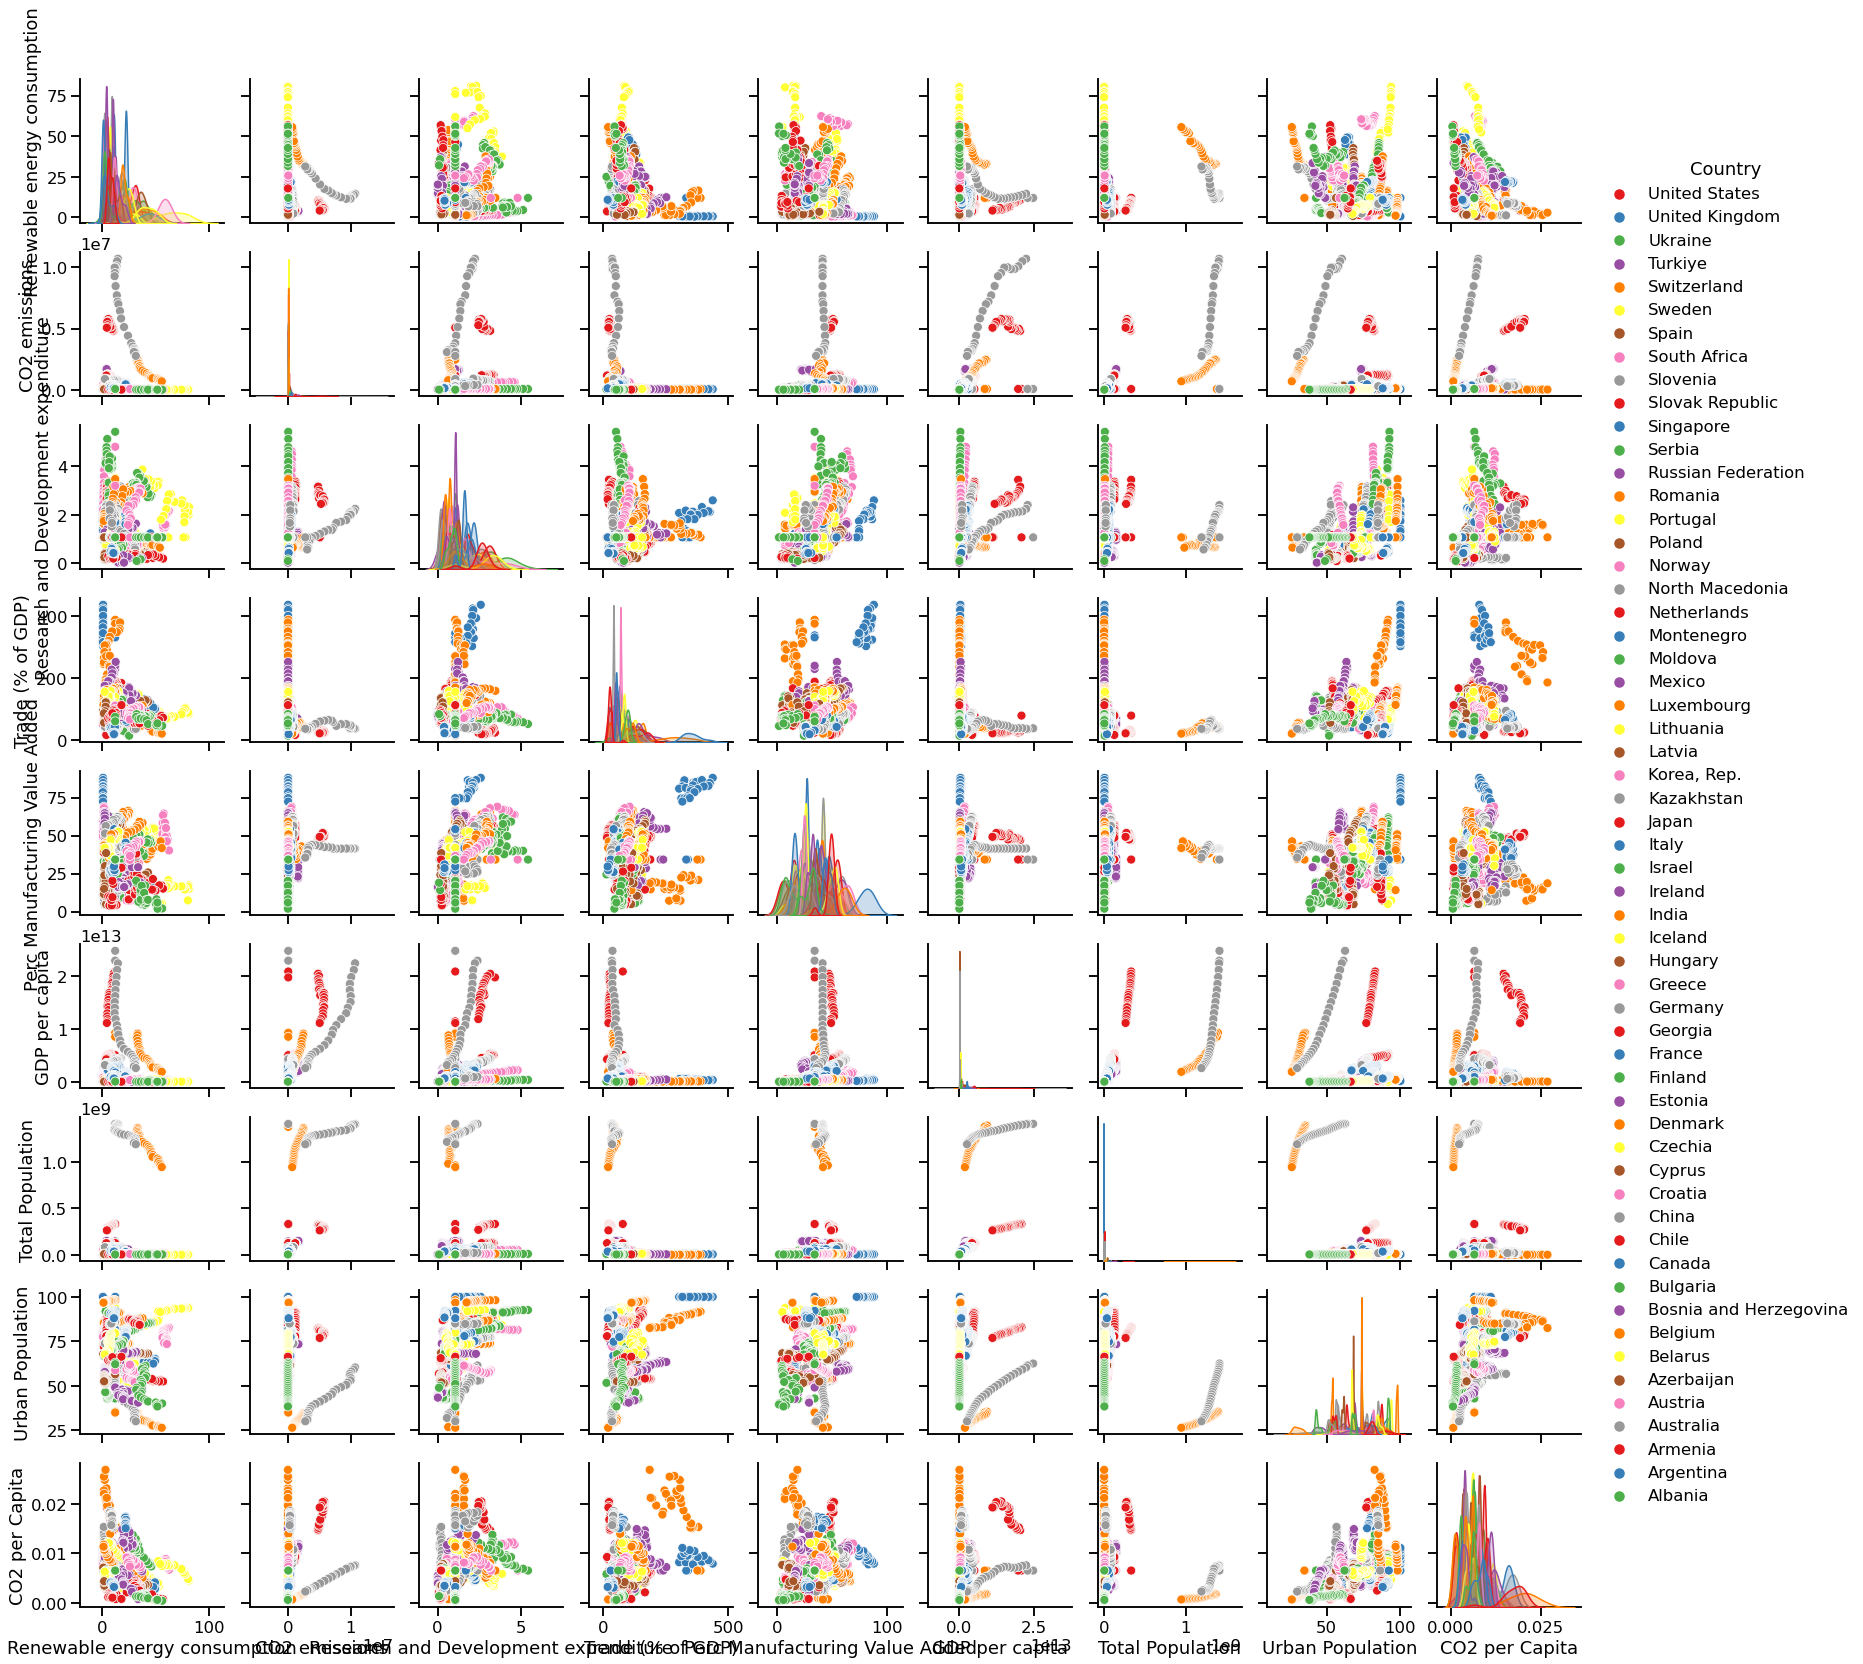

In [63]:
# create pair plots to investigate relations between data, focusing on countries
seas.pairplot(data=MainData, hue='Country', palette="Set1")

In [ ]:
# create pair plots to investigate relations between data, focusing on countries
seas.pairplot(data= MainData, hue='Time', palette="Set1")

### BOX PLOTS:

In [1]:
# create box plots to further investigate data and their distributions
from plotly.subplots import make_subplots
import plotly.graph_objects as go

n_rows=3
n_cols=3

vars = ['Renewable energy consumption', 'CO2 emissions', 'Research and Development expenditure',
       'Trade (% of GDP)', 'Perc Manufacturing Value Added', 'GDP per capita',
       'Total Population', 'Urban Population', 'CO2 per Capita']

figsize = (18,15)

fig = make_subplots(rows=n_rows, cols=n_cols)

fig.update_layout(template="plotly_dark",width=1400,
    height=1000)

for i, var in enumerate(vars):
    
    fig.add_trace(
        go.Box(y=MainData[var],
        name=var),
        row=(i//n_cols)+1, col=(i%n_cols)+1,
    )

fig.update_traces(boxpoints='all', jitter=.3)


NameError: name 'MainData' is not defined

### HEATMAP:

<AxesSubplot:>

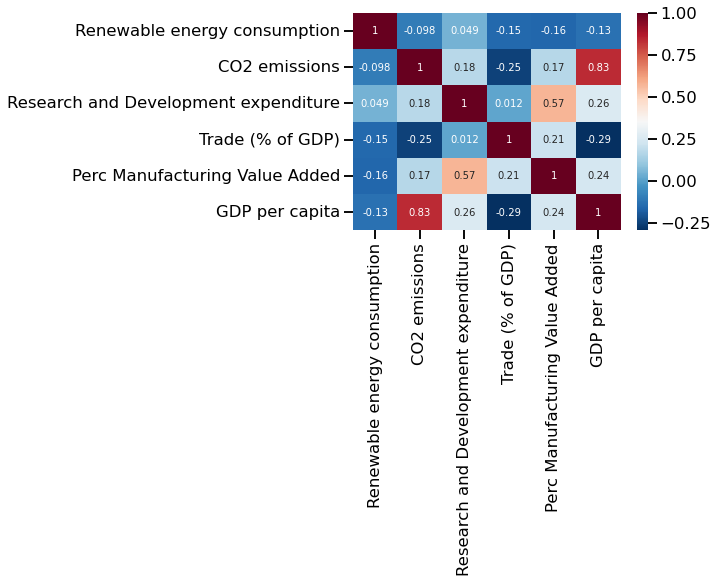

In [144]:
sns.heatmap(Alp.corr(),cmap="RdBu_r", annot=True)

#### CORRELATION MATRIX TO FIND THE RELATION BETWEEN THE COVARIATES AND THE RESPONSE:

In [65]:
corr_matrix = MainData.corr() 
corr_matrix['CO2 per Capita'].sort_values(ascending=False)

CO2 per Capita                          1.000000
Urban Population                        0.450200
Research and Development expenditure    0.374399
Perc Manufacturing Value Added          0.238218
GDP per capita                          0.235124
CO2 emissions                           0.213128
Trade (% of GDP)                        0.177665
Total Population                       -0.107618
Renewable energy consumption           -0.337587
Name: CO2 per Capita, dtype: float64

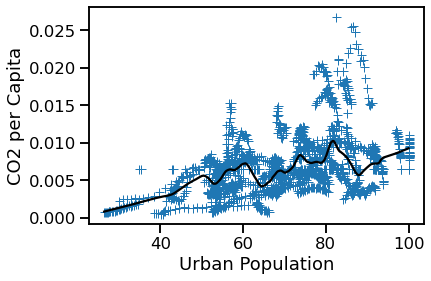

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Urban Population"], frac=0.1)
plt.plot(MainData["Urban Population"],MainData["CO2 per Capita"], '+')
plt.xlabel("Urban Population")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

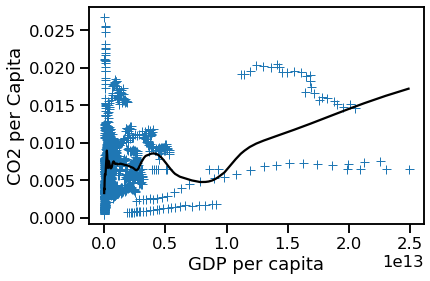

In [67]:
#Medium and high-tech manufacturing value 
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["GDP per capita"], frac=0.1)
plt.plot(MainData["GDP per capita"],MainData["CO2 per Capita"], '+')
plt.xlabel("GDP per capita")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

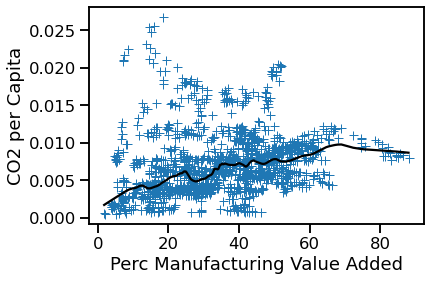

In [68]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Perc Manufacturing Value Added"], frac=0.1)
plt.plot(MainData["Perc Manufacturing Value Added"],MainData["CO2 per Capita"], '+')
plt.xlabel("Perc Manufacturing Value Added")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

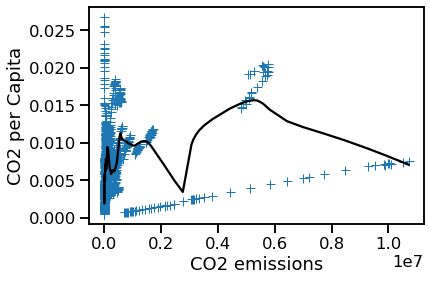

In [69]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["CO2 emissions"], frac=0.1)
plt.plot(MainData["CO2 emissions"],MainData["CO2 per Capita"], '+')
plt.xlabel("CO2 emissions")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

/Users/ponswarnalayaravichandran/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in true_divide



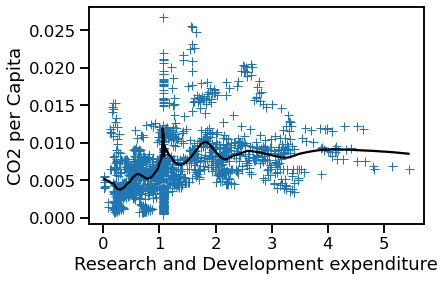

In [70]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Research and Development expenditure"], frac=0.1)
plt.plot(MainData["Research and Development expenditure"], MainData["CO2 per Capita"], '+')
plt.xlabel("Research and Development expenditure")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

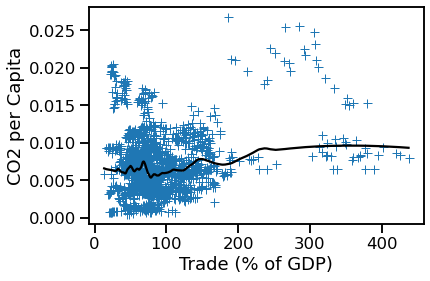

In [71]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Trade (% of GDP)"], frac=0.1)
plt.plot(MainData["Trade (% of GDP)"],MainData["CO2 per Capita"], '+')
plt.xlabel("Trade (% of GDP)")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='black')
plt.show()

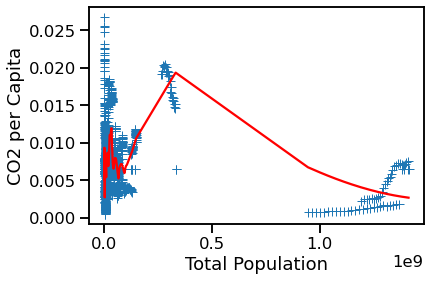

In [72]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Total Population"], frac=0.1)
plt.plot(MainData["Total Population"], MainData["CO2 per Capita"], '+')
plt.xlabel("Total Population")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='Red')
plt.show()

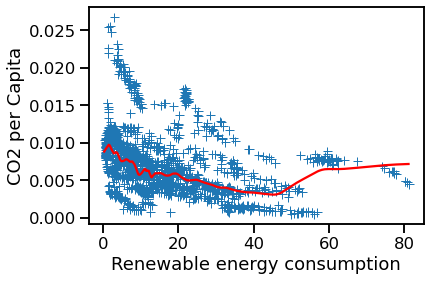

In [73]:
lowess = sm.nonparametric.lowess(MainData["CO2 per Capita"], MainData["Renewable energy consumption"], frac=0.1)
plt.plot(MainData["Renewable energy consumption"],MainData["CO2 per Capita"], '+')
plt.xlabel("Renewable energy consumption")
plt.ylabel("CO2 per Capita")
plt.plot(lowess[:, 0], lowess[:, 1],color='Red')
plt.show()

##### COVARIATES LIKE  URBAN POPULATION, RESEARCH AND DEVELOPMENT EXPENDITURE, PERC MANUFACTURING VALUE ADDED, GDP PER CAPITA, CO2 EMISSION, TRADE (% OF GDP), TOTAL POPULATION AND RENEWABLE ENERGY CONSUMPTION          HAVE SIGNIFICANT CORRELATION WITH THE RESPONSE(CO2 PER CAPITA).

### DATA SPILTING:

In [76]:
# plot data into testing and training sets, where 80% of the data is for training
X = MainData[['Renewable energy consumption','Trade (% of GDP)','Perc Manufacturing Value Added','GDP per capita','Urban Population']]
y = MainData['CO2 per Capita']
  
# using the train test split function
X_train, X_test,y_train, y_test, = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

In [78]:
# create a function to get the output measures of a model on the test data. We will compare these measures to determine the best model hyperparameters
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    mse = np.sqrt(np.sum((y_test - predictions)**2)) / len(y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy: {:0.2f}%.'.format(accuracy))
    print('Mean Squared Error: {:0.6f}'.format(np.mean(mse)))
    print('Mean Absolute Percentage Error (MAPE): {:0.2f}'.format(mape))

    return np.mean(errors), accuracy, mape, np.mean(mse)

### RANDOM FOREST (BASE MODEL):

In [80]:
# this is the most basic model that will serve as a baseline comparison
base_rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_rf_model.fit(X_train, y_train)
base_rf_errors, base_rf_accuracy, base_rf_mape, base_rf_mse = evaluate(base_rf_model, X_test, y_test)

Model Performance
Average Error: 0.0007 degrees.
Accuracy: 85.74%.
Mean Squared Error: 0.000066
Mean Absolute Percentage Error (MAPE): 14.26


### RANDOMIZEDSEARCHCV:

In [82]:
# try a random search approach to finding the best model parameters
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # <- Number of trees in random forest
max_features = ['auto', 'sqrt'] # <- Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # <-  Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # <- Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # <- Minimum number of samples required at each leaf node
bootstrap = [True, False] # <- Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### COMBINATION TO TRY HYPERPARAMETER TUNING:

In [84]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [85]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

### RANDOM SEARCH BEST PARAMETERS


##### MEAN CROSS VALIDATED SCORE OF THE BEST ESTIMATOR

In [87]:
# print out the best score!
print('The best score is : {}%'.format(round(rf_random.best_score_*100.0, 2)))

The best score is : 92.9%


In [88]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

#### BEST RANDOM SEARCH MODEL EVALUATION:

In [90]:
# show the overall model performance of the best random search model
best_random = rf_random.best_estimator_
random_rf_errors,random_rf_accuracy,random_rf_mape,random_rf_mse = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0005 degrees.
Accuracy: 89.33%.
Mean Squared Error: 0.000052
Mean Absolute Percentage Error (MAPE): 10.67


### GRIDSEARCHCV:

In [92]:
# Create the parameter grid based on the results of random search 
param_grid = {
      'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, None],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [600, 800, 1000, 1200, 1400]
    }

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [95]:
# apply grid search method to finding best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, None],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [600, 800, 1000, 1200, 1400]},
             return_train_score=True, verbose=2)

In [97]:
# print best grid search model score!
print('The best score is : {}%'.format(round(grid_search.best_score_*100.0, 2)))

The best score is : 91.83%


In [98]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

##### BEST GRID SEARCH MODEL EVALUATION:

In [100]:
# show the associated model parameters of the best grid search
best_grid = grid_search.best_estimator_ 
grid_rf_errors,grid_rf_accuracy,grid_rf_mape,grid_rf_mse = evaluate(best_grid, X_test, y_test) 

Model Performance
Average Error: 0.0006 degrees.
Accuracy: 87.06%.
Mean Squared Error: 0.000058
Mean Absolute Percentage Error (MAPE): 12.94


### MIXED EFFECTS OF RANDOM FOREST

PREDICTOR VARIABLE RANDOM FOREST
(Try using the predictors as all random effects, and compare with further down where we use them as fixed effects)

#### BASE MODEL

In [103]:
# run the base model to compare with the other approaches
cv = KFold(n_splits=5, shuffle=True)
mse_base_re_mrf = []
mape_base_re_mrf = []
error_base_re_mrf = []
accuracy_base_re_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as RE
    base_re_mrf = MERF()
    X_train =  train[['Time']]
    Z_train = np.array((np.ones(len(X_train)), train['Renewable energy consumption'], 
                                               train['Trade (% of GDP)'],
                                               train['Perc Manufacturing Value Added'],
                                               train['GDP per capita'],
                                               train['Urban Population'])).T
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    base_re_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as RE
    X_test =  test[['Time']]
    Z_test = np.array((np.ones(len(X_test)),test['Renewable energy consumption'], 
                                               test['Trade (% of GDP)'],
                                               test['Perc Manufacturing Value Added'],
                                               test['GDP per capita'],
                                               test['Urban Population'])).T
    clusters_test = test['Country']
    yhat_mrf = base_re_mrf.predict(X_test, Z_test, clusters_test)
    mse_base_re_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_base_re_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_base_re_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_base_re_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_base_re_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_base_re_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_base_re_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_base_re_mrf)))

INFO     [merf.py:307] Training GLL is -2275.5113893738876 at iteration 1.
INFO     [merf.py:307] Training GLL is -5803.204894958603 at iteration 2.
INFO     [merf.py:307] Training GLL is -8491.000960841571 at iteration 3.
INFO     [merf.py:307] Training GLL is -11130.17605937984 at iteration 4.
INFO     [merf.py:307] Training GLL is -13727.308901628681 at iteration 5.
INFO     [merf.py:307] Training GLL is -16282.31397032431 at iteration 6.
INFO     [merf.py:307] Training GLL is -18802.793203721598 at iteration 7.
INFO     [merf.py:307] Training GLL is -21269.490658641105 at iteration 8.
INFO     [merf.py:307] Training GLL is -23550.70034524841 at iteration 9.
INFO     [merf.py:307] Training GLL is -25251.564419693626 at iteration 10.
INFO     [merf.py:307] Training GLL is -26026.519731702683 at iteration 11.
INFO     [merf.py:307] Training GLL is -26252.584574438486 at iteration 12.
INFO     [merf.py:307] Training GLL is -26326.918348663115 at iteration 13.
INFO     [merf.py:307] Tra

Model Performance
Average Error: 0.0005 degrees.
Accuracy: 87.27%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 12.73%


<AxesSubplot:>

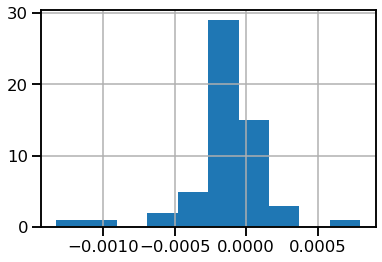

In [104]:
base_re_mrf.b_hat_history[-1][1].hist()

#### Model - MERF with the Best Random Search Parameter

In [105]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [106]:
# run the model with the best parameters as given by the random search approach
cv = KFold(n_splits=5, shuffle=True)
mse_random_re_mrf = []
mape_random_re_mrf = []
error_random_re_mrf = []
accuracy_random_re_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as RE
    random_re_mrf = MERF(fixed_effects_model=RandomForestRegressor(n_estimators=800,
                                                             min_samples_split= 2,
                                                             min_samples_leaf= 1,
                                                             max_features= 'auto',
                                                             max_depth= 100,
                                                             bootstrap= True))
    X_train =  train[['Time']]
    Z_train = np.array((np.ones(len(X_train)), train['Renewable energy consumption'], 
                                               train['Trade (% of GDP)'],
                                               train['Perc Manufacturing Value Added'],
                                               train['GDP per capita'],
                                               train['Urban Population'])).T
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    random_re_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as RE
    X_test =  test[['Time']]
    Z_test = np.array((np.ones(len(X_test)),test['Renewable energy consumption'], 
                                               test['Trade (% of GDP)'],
                                               test['Perc Manufacturing Value Added'],
                                               test['GDP per capita'],
                                               test['Urban Population'])).T
    clusters_test = test['Country']
    yhat_mrf = random_re_mrf.predict(X_test, Z_test, clusters_test)
    mse_random_re_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_random_re_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_random_re_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_random_re_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_random_re_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_random_re_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_random_re_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_random_re_mrf)))

INFO     [merf.py:307] Training GLL is -2217.8279233952353 at iteration 1.
INFO     [merf.py:307] Training GLL is -5811.258136644033 at iteration 2.
INFO     [merf.py:307] Training GLL is -8499.04269803017 at iteration 3.
INFO     [merf.py:307] Training GLL is -11138.27709742653 at iteration 4.
INFO     [merf.py:307] Training GLL is -13735.365324675253 at iteration 5.
INFO     [merf.py:307] Training GLL is -16289.184104005013 at iteration 6.
INFO     [merf.py:307] Training GLL is -18807.063712793104 at iteration 7.
INFO     [merf.py:307] Training GLL is -21267.60573549837 at iteration 8.
INFO     [merf.py:307] Training GLL is -23527.480018598628 at iteration 9.
INFO     [merf.py:307] Training GLL is -25175.14715841747 at iteration 10.
INFO     [merf.py:307] Training GLL is -25898.80588218694 at iteration 11.
INFO     [merf.py:307] Training GLL is -26106.75688025549 at iteration 12.
INFO     [merf.py:307] Training GLL is -26177.328301280555 at iteration 13.
INFO     [merf.py:307] Traini

Model Performance
Average Error: 0.0005 degrees.
Accuracy: 93.40%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 6.60%


<AxesSubplot:>

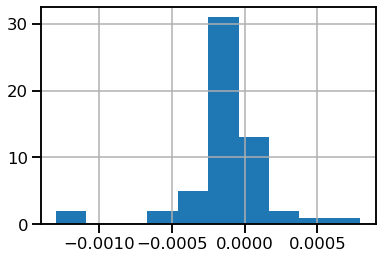

In [107]:
random_re_mrf.b_hat_history[-1][1].hist()

### Model - MERF with the Best Grid Search Parameter


In [108]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [110]:
# run the model with the best parameters as given by the grid search approach
cv = KFold(n_splits=5, shuffle=True)
mse_grid_re_mrf = []
mape_grid_re_mrf = []
error_grid_re_mrf = []
accuracy_grid_re_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as RE
    grid_re_mrf = MERF(fixed_effects_model=RandomForestRegressor(n_estimators=1000,
                                                             min_samples_split= 2,
                                                             min_samples_leaf= 1,
                                                             max_features= 'auto',
                                                             max_depth= 80,
                                                             bootstrap= True))
    X_train =  train[['Time']]
    Z_train = np.array((np.ones(len(X_train)), train['Renewable energy consumption'], 
                                               train['Trade (% of GDP)'],
                                               train['Perc Manufacturing Value Added'],
                                               train['GDP per capita'],
                                               train['Urban Population'])).T
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    grid_re_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as RE
    X_test =  test[['Time']]
    Z_test = np.array((np.ones(len(X_test)),test['Renewable energy consumption'], 
                                               test['Trade (% of GDP)'],
                                               test['Perc Manufacturing Value Added'],
                                               test['GDP per capita'],
                                               test['Urban Population'])).T
    clusters_test = test['Country']
    yhat_mrf = grid_re_mrf.predict(X_test, Z_test, clusters_test)
    mse_grid_re_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_grid_re_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_grid_re_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_grid_re_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_grid_re_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_grid_re_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_grid_re_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_grid_re_mrf)))

INFO     [merf.py:307] Training GLL is -2356.1699207761167 at iteration 1.
INFO     [merf.py:307] Training GLL is -5801.074975986699 at iteration 2.
INFO     [merf.py:307] Training GLL is -8485.986929536984 at iteration 3.
INFO     [merf.py:307] Training GLL is -11123.963322299032 at iteration 4.
INFO     [merf.py:307] Training GLL is -13720.81461476163 at iteration 5.
INFO     [merf.py:307] Training GLL is -16274.90693923025 at iteration 6.
INFO     [merf.py:307] Training GLL is -18793.82038504265 at iteration 7.
INFO     [merf.py:307] Training GLL is -21258.32514816502 at iteration 8.
INFO     [merf.py:307] Training GLL is -23532.480000765634 at iteration 9.
INFO     [merf.py:307] Training GLL is -25209.31653067048 at iteration 10.
INFO     [merf.py:307] Training GLL is -25949.04760811699 at iteration 11.
INFO     [merf.py:307] Training GLL is -26156.940768594322 at iteration 12.
INFO     [merf.py:307] Training GLL is -26226.738765953258 at iteration 13.
INFO     [merf.py:307] Traini

Model Performance
Average Error: 0.0005 degrees.
Accuracy: 93.04%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 6.96%


<AxesSubplot:>

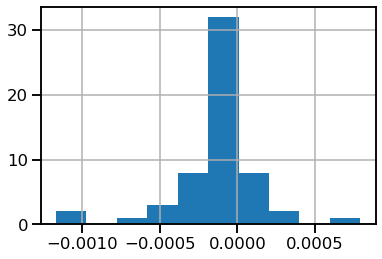

In [111]:
grid_re_mrf.b_hat_history[-1][1].hist()

### Predictor variable as Fixed Effect

Run the same model but using the predictors as fixed effects

#### Base Model

In [112]:
# run the model with the base parameters as a comparison baseline
cv = KFold(n_splits=5, shuffle=True)
mse_base_fe_mrf = []
mape_base_fe_mrf = []
error_base_fe_mrf = []
accuracy_base_fe_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as FE
    base_fe_mrf = MERF()
    X_train =  train[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_train = np.ones((len(X_train), 1))
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    base_fe_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as FE
    X_test =  test[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_test = np.ones((len(X_test), 1))
    clusters_test = test['Country']
    yhat_mrf = base_fe_mrf.predict(X_test, Z_test, clusters_test)
    mse_base_fe_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_base_fe_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_base_fe_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_base_fe_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_base_fe_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_base_fe_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_base_fe_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_base_fe_mrf)))

INFO     [merf.py:307] Training GLL is -4201.793715660778 at iteration 1.
INFO     [merf.py:307] Training GLL is -8403.458427139312 at iteration 2.
INFO     [merf.py:307] Training GLL is -12602.27850648316 at iteration 3.
INFO     [merf.py:307] Training GLL is -16729.470084644407 at iteration 4.
INFO     [merf.py:307] Training GLL is -19796.411586717873 at iteration 5.
INFO     [merf.py:307] Training GLL is -20240.891306752874 at iteration 6.
INFO     [merf.py:307] Training GLL is -20293.631382132524 at iteration 7.
INFO     [merf.py:307] Training GLL is -20261.628731609468 at iteration 8.
INFO     [merf.py:307] Training GLL is -20268.618420990922 at iteration 9.
INFO     [merf.py:307] Training GLL is -20326.24108922658 at iteration 10.
INFO     [merf.py:307] Training GLL is -20253.76347388166 at iteration 11.
INFO     [merf.py:307] Training GLL is -20342.408112775753 at iteration 12.
INFO     [merf.py:307] Training GLL is -20363.194054678293 at iteration 13.
INFO     [merf.py:307] Tra

Model Performance
Average Error: 0.0004 degrees.
Accuracy: 93.24%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 6.76%


<AxesSubplot:>

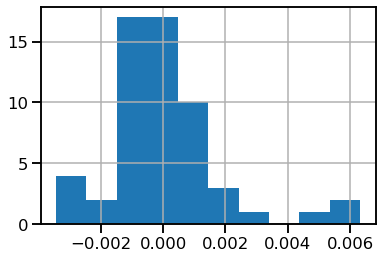

In [113]:
base_fe_mrf.b_hat_history[-1][0].hist()

### MODEL - MERF with the Best Random Search Parameter

In [114]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [115]:
# run the model with the best parameters as given by the random search approach
cv = KFold(n_splits=5, shuffle=True)
mse_random_fe_mrf = []
mape_random_fe_mrf = []
error_random_fe_mrf = []
accuracy_random_fe_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as FE
    random_fe_mrf = MERF(fixed_effects_model=RandomForestRegressor(n_estimators=800,
                                                             min_samples_split= 2,
                                                             min_samples_leaf= 1,
                                                             max_features= 'auto',
                                                             max_depth= 100,
                                                             bootstrap= True))
    X_train =  train[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_train = np.ones((len(X_train), 1))
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    random_fe_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as FE
    X_test =  test[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_test = np.ones((len(X_test), 1))
    clusters_test = test['Country']
    yhat_mrf = random_fe_mrf.predict(X_test, Z_test, clusters_test)
    mse_random_fe_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_random_fe_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_random_fe_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_random_fe_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_random_fe_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_random_fe_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_random_fe_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_random_fe_mrf)))

INFO     [merf.py:307] Training GLL is -4201.794236513427 at iteration 1.
INFO     [merf.py:307] Training GLL is -8403.456897302596 at iteration 2.
INFO     [merf.py:307] Training GLL is -12601.972846803887 at iteration 3.
INFO     [merf.py:307] Training GLL is -16726.144662018953 at iteration 4.
INFO     [merf.py:307] Training GLL is -19786.109959537636 at iteration 5.
INFO     [merf.py:307] Training GLL is -20247.16400609227 at iteration 6.
INFO     [merf.py:307] Training GLL is -20295.743231500946 at iteration 7.
INFO     [merf.py:307] Training GLL is -20273.896449059113 at iteration 8.
INFO     [merf.py:307] Training GLL is -20281.43941798472 at iteration 9.
INFO     [merf.py:307] Training GLL is -20287.23298025979 at iteration 10.
INFO     [merf.py:307] Training GLL is -20253.811939357107 at iteration 11.
INFO     [merf.py:307] Training GLL is -20242.85175601408 at iteration 12.
INFO     [merf.py:307] Training GLL is -20190.088214182335 at iteration 13.
INFO     [merf.py:307] Trai

Model Performance
Average Error: 0.0004 degrees.
Accuracy: 92.73%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 7.27%


<AxesSubplot:>

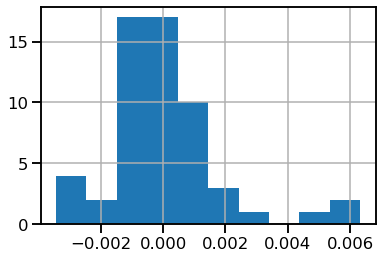

In [117]:
base_fe_mrf.b_hat_history[-1][0].hist()

### MODEL - MERF with the Best Grid Search Parameter

In [118]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [119]:
# run the model with the best parameters as given by the random grid approach
cv = KFold(n_splits=5, shuffle=True)
mse_grid_fe_mrf = []
mape_grid_fe_mrf = []
error_grid_fe_mrf = []
accuracy_grid_fe_mrf = []

for train_idx, test_idx in cv.split(MainData):
    # actually split the data
    train = MainData.iloc[train_idx]
    test = MainData.iloc[test_idx]
    # ground truth
    y = test['CO2 per Capita']

    # Mixed Effects Random Forest Training with 5 vaiables as FE
    grid_fe_mrf = MERF(fixed_effects_model=RandomForestRegressor(n_estimators=1000,
                                                             min_samples_split= 2,
                                                             min_samples_leaf= 1,
                                                             max_features= 3,
                                                             max_depth= 80,
                                                             bootstrap= True))
    X_train =  train[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_train = np.ones((len(X_train), 1))
    clusters_train = train['Country']
    y_train = train['CO2 per Capita']
    grid_fe_mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with 5 vaiables as FE
    X_test =  test[['Time',
                     'Renewable energy consumption',
                     'Trade (% of GDP)',
                     'Perc Manufacturing Value Added',
                     'GDP per capita',
                     'Urban Population']]
    Z_test = np.ones((len(X_test), 1))
    clusters_test = test['Country']
    yhat_mrf = grid_fe_mrf.predict(X_test, Z_test, clusters_test)
    mse_grid_fe_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))

    errors = abs(y - yhat_mrf)
    error_grid_fe_mrf.append(errors)    
    mape = 100 * np.mean(errors / yhat_mrf)
    mape_grid_fe_mrf.append(mape)
    accuracy = 100 - mape
    accuracy_grid_fe_mrf.append(accuracy)

print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(np.mean([np.mean(error_set) for error_set in error_grid_fe_mrf]))))
print('Accuracy: {:0.2f}%.'.format(np.mean(accuracy_grid_fe_mrf)))
print('MSE: {:0.2f}.'.format(np.mean(mse_grid_fe_mrf)))
print('Mean Absolute Percentage Error (MAPE): {:0.2f}%'.format(np.mean(mape_grid_fe_mrf)))

INFO     [merf.py:307] Training GLL is -4201.794080260736 at iteration 1.
INFO     [merf.py:307] Training GLL is -8403.469228520435 at iteration 2.
INFO     [merf.py:307] Training GLL is -12602.310845791038 at iteration 3.
INFO     [merf.py:307] Training GLL is -16731.49649531344 at iteration 4.
INFO     [merf.py:307] Training GLL is -19886.801228941044 at iteration 5.
INFO     [merf.py:307] Training GLL is -20400.860229611695 at iteration 6.
INFO     [merf.py:307] Training GLL is -20402.77160972166 at iteration 7.
INFO     [merf.py:307] Training GLL is -20412.64037880983 at iteration 8.
INFO     [merf.py:307] Training GLL is -20419.326223827287 at iteration 9.
INFO     [merf.py:307] Training GLL is -20378.09459764638 at iteration 10.
INFO     [merf.py:307] Training GLL is -20365.85903644159 at iteration 11.
INFO     [merf.py:307] Training GLL is -20341.52673221577 at iteration 12.
INFO     [merf.py:307] Training GLL is -20325.378637623464 at iteration 13.
INFO     [merf.py:307] Traini

Model Performance
Average Error: 0.0004 degrees.
Accuracy: 93.26%.
MSE: 0.00.
Mean Absolute Percentage Error (MAPE): 6.74%


### Model Evaluation Metrics Summary

In [121]:
# Now! We compare the metrics of all the models we ran to determine the best one!
data = [['Random Forest (Base Model)', base_rf_errors,base_rf_accuracy,base_rf_mse,base_rf_mape],
['Random Forest (Best Random Search Model)',random_rf_errors,random_rf_accuracy,random_rf_mse,random_rf_mape],
['Random Forest (Best Grid Search Model)',grid_rf_errors,grid_rf_accuracy,grid_rf_mse,grid_rf_mape],
['MERF with Predictor Variable as RE (Base Model)', round(np.mean(np.mean([np.mean(error_set) for error_set in error_base_re_mrf])),6),round(np.mean(accuracy_base_re_mrf),1),round(np.mean(mse_base_re_mrf),6),round(np.mean(mape_base_re_mrf),2)],
['MERF with Predictor Variable as RE (Best Random Search Model)',round(np.mean(np.mean([np.mean(error_set) for error_set in error_random_re_mrf])),6),round(np.mean(accuracy_random_re_mrf),2),round(np.mean(mse_random_re_mrf),6),round(np.mean(mape_random_re_mrf),2)],
['MERF with Predictor Variable as RE (Best Grid Search Model)',round(np.mean(np.mean([np.mean(error_set) for error_set in error_grid_re_mrf])),6),round(np.mean(accuracy_grid_re_mrf),2),round(np.mean(mse_grid_re_mrf),6),round(np.mean(mape_grid_re_mrf),2)],
['MERF with Predictor Variable as FE (Base Model)', round(np.mean(np.mean([np.mean(error_set) for error_set in error_base_fe_mrf])),6),round(np.mean(accuracy_base_fe_mrf),2),round(np.mean(mse_base_fe_mrf),6),round(np.mean(mape_base_fe_mrf),2)],
['MERF with Predictor Variable as FE (Best Random Search Model)',round(np.mean(np.mean([np.mean(error_set) for error_set in error_random_fe_mrf])),6),round(np.mean(accuracy_random_fe_mrf),2),round(np.mean(mse_random_fe_mrf),6),round(np.mean(mape_random_fe_mrf),2)],
['MERF with Predictor Variable as FE (Best Grid Search Model)',round(np.mean(np.mean([np.mean(error_set) for error_set in error_grid_fe_mrf])),6),round(np.mean(accuracy_grid_fe_mrf),2),round(np.mean(mse_grid_fe_mrf),6),round(np.mean(mape_grid_fe_mrf),2)]]

In [122]:
# put the results from the output crunching in a dataframe
results = pd.DataFrame(data = data, columns=['Model',
                                'Average Error',
                                'Accuracy', 
                                'Mean Squared Error (MSE)',
                                'Mean Absolute Percentage Error (MAPE)'])

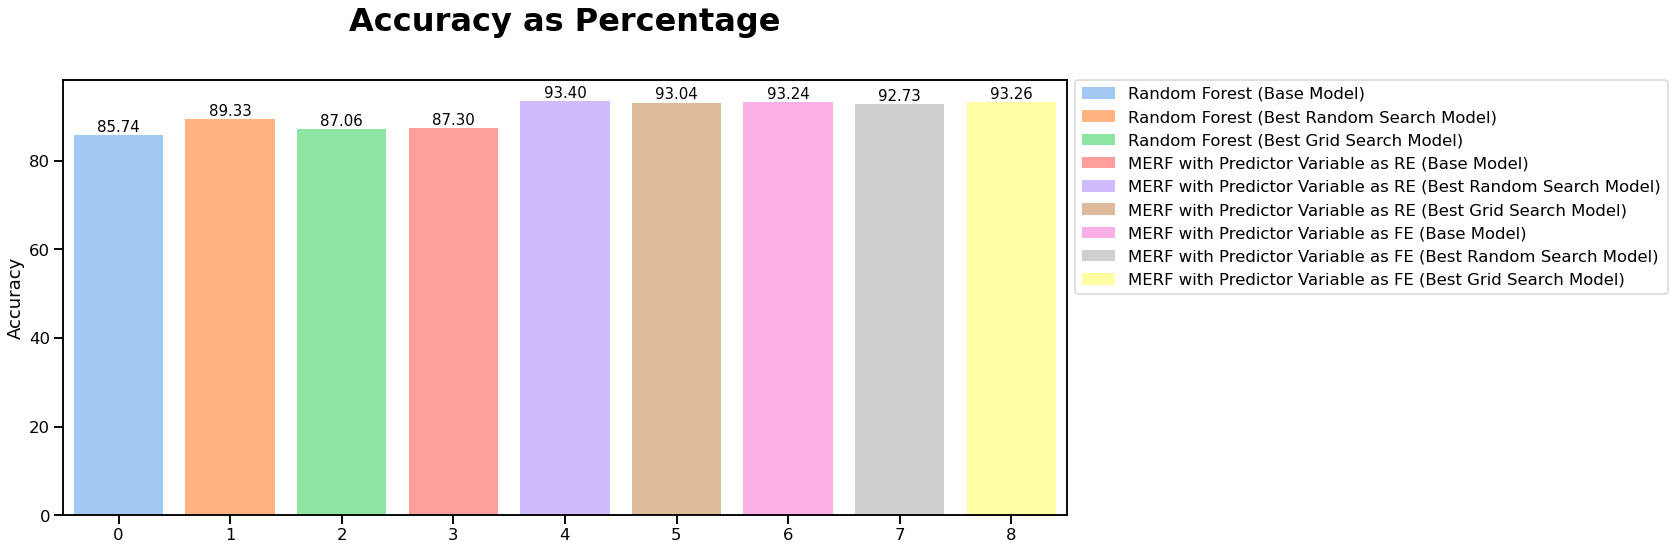

In [123]:
# plot the different models' accuracy to compare them
plt.figure(figsize=(18,8))
ax = sns.barplot(x = results.index, y = 'Accuracy', data = results,hue = 'Model',
            palette = 'pastel',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'black', errwidth = 2,  
            ci = 'sd',
            dodge = False
            )

ax.legend(bbox_to_anchor=(1, 1.02))
ax.set_title("Accuracy as Percentage",fontdict= { 'fontsize': 32,'fontweight':'bold'}, y = 1.1)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


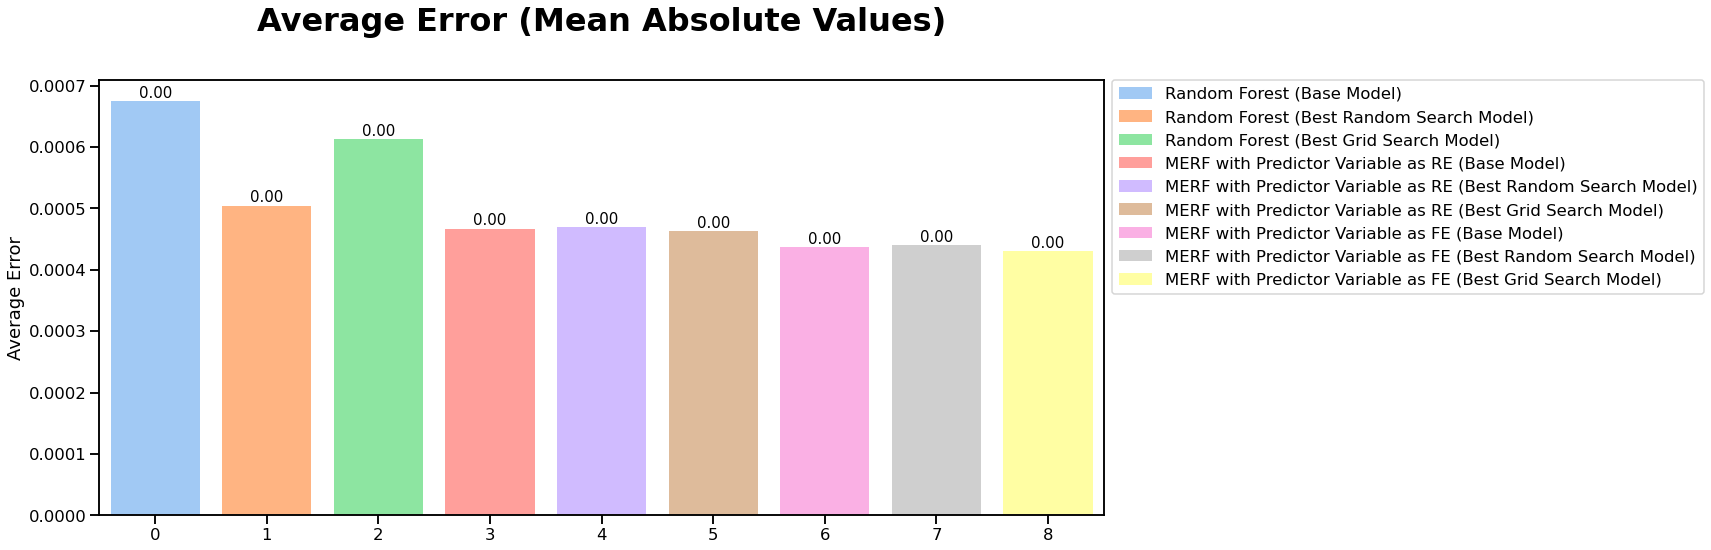

In [124]:
# plot the different models' mean absolute value to compare them
plt.figure(figsize=(18,8))
ax = sns.barplot(x = results.index, y = 'Average Error', data = results,hue = 'Model',
            palette = 'pastel',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'black', errwidth = 2,  
            ci = 'sd',
            dodge = False
            )

ax.legend(bbox_to_anchor=(1, 1.02))
ax.set_title("Average Error (Mean Absolute Values)",fontdict= { 'fontsize': 32,'fontweight':'bold'}, y = 1.1)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


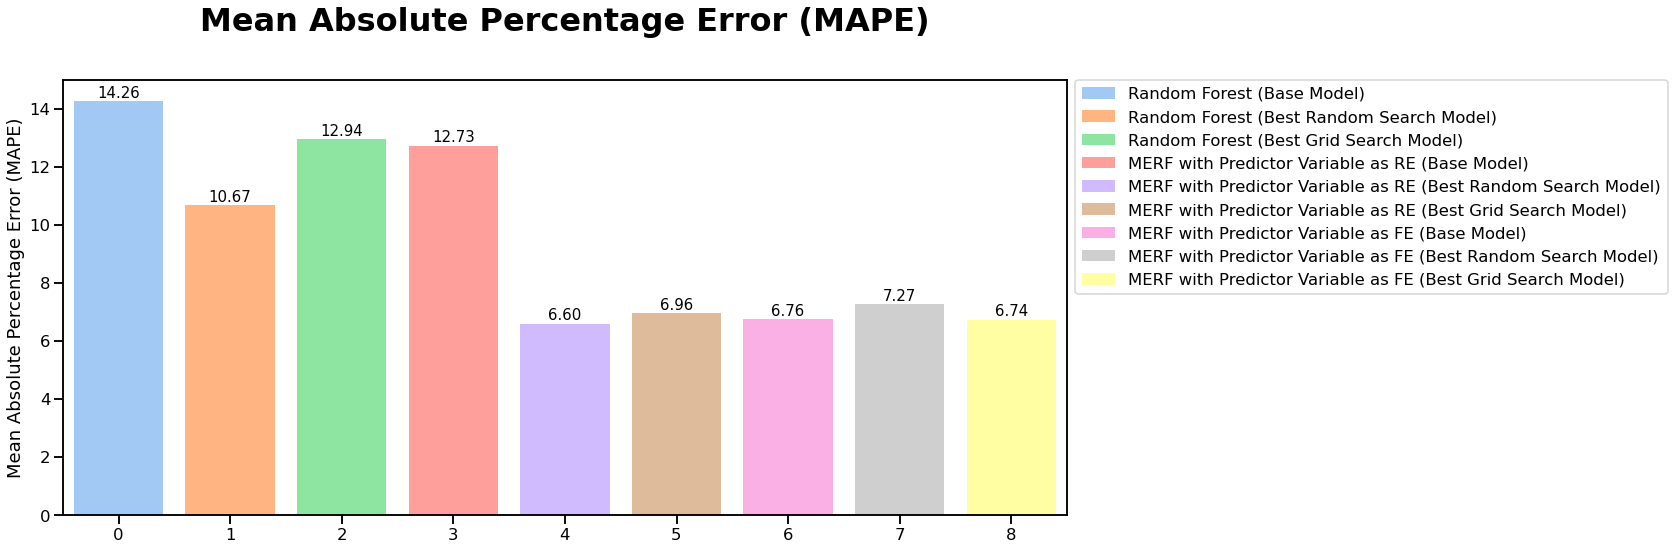

In [125]:
# plot the different models' MAPE to compare them
plt.figure(figsize=(18,8))
ax = sns.barplot(x = results.index, y = 'Mean Absolute Percentage Error (MAPE)', data = results,hue = 'Model',
            palette = 'pastel',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'black', errwidth = 2,  
            ci = 'sd',
            dodge = False
            )

ax.legend(bbox_to_anchor=(1, 1.02))
ax.set_title("Mean Absolute Percentage Error (MAPE)",fontdict= { 'fontsize': 32,'fontweight':'bold'}, y = 1.1)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


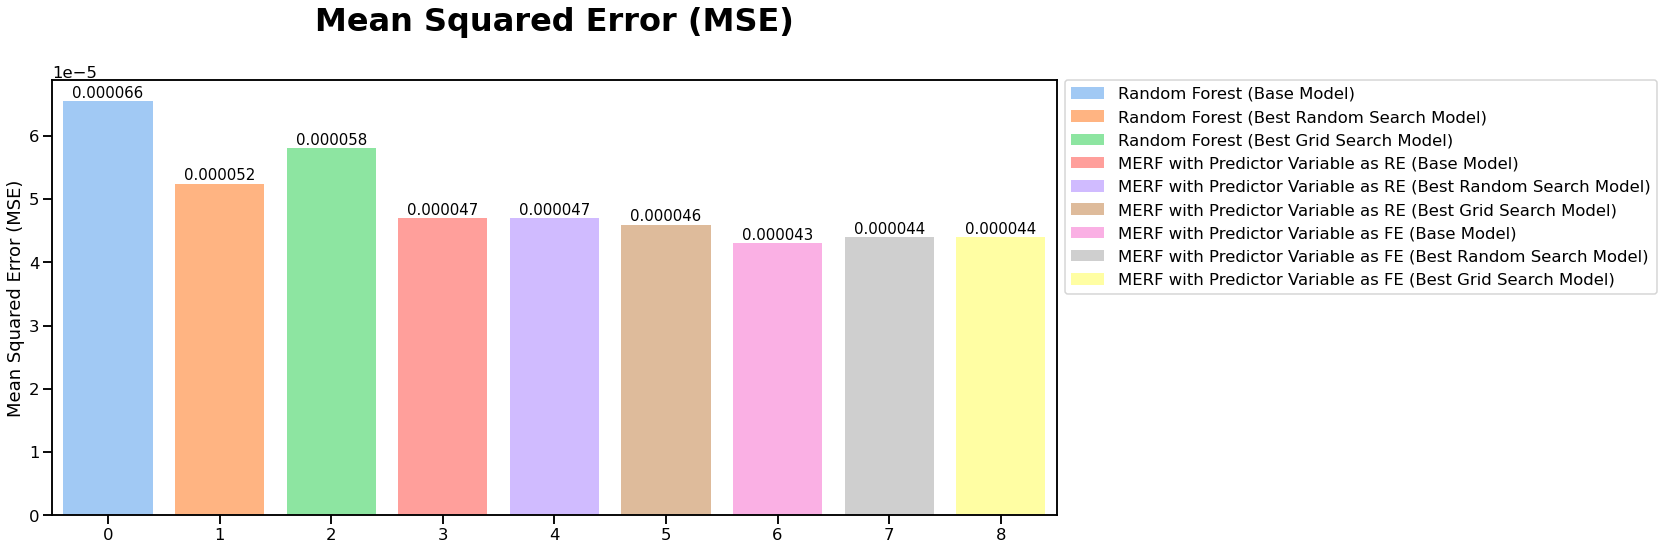

In [126]:
# plot the different models' MSE to compare them
plt.figure(figsize=(18,8))
ax = sns.barplot(x = results.index, y = 'Mean Squared Error (MSE)', data = results,hue = 'Model',
            palette = 'pastel',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'black', errwidth = 1,  
            ci = 'sd',
            dodge = False
            )

ax.legend(bbox_to_anchor=(1, 1.02))
ax.set_title("Mean Squared Error (MSE)",fontdict= { 'fontsize': 32,'fontweight':'bold'}, y = 1.1)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.6f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')



In [ ]:
Histogram for the b hats

<AxesSubplot:xlabel='0', ylabel='Count'>

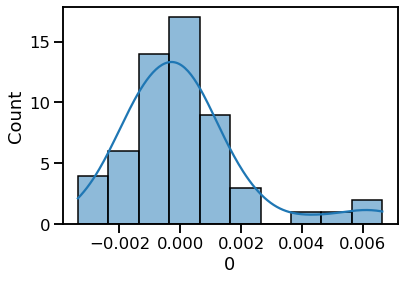

In [127]:
seas.histplot(grid_fe_mrf.b_hat_history[-1][0],kde='density')

In [135]:
train_data = MainData.sample(frac=0.75, random_state=25)
test_data = MainData.drop(train_data.index)
print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")


No. of training examples: 1197
No. of testing examples: 399


In [136]:
X_train = MainData[MainData.columns[2:8]]
Z_train = np.ones((len(X_train), 1))
clusters_train = MainData['Country']
y_train= MainData['CO2 per Capita']

In [137]:
Z_train.shape

(1596, 1)

In [138]:
mrf = MERF(max_iterations=20)
mrf.fit(X_train,Z_train, clusters_train, y_train)

INFO     [merf.py:307] Training GLL is -5566.129362394701 at iteration 1.
INFO     [merf.py:307] Training GLL is -11131.970888702663 at iteration 2.
INFO     [merf.py:307] Training GLL is -16690.21922709929 at iteration 3.
INFO     [merf.py:307] Training GLL is -22042.106410330493 at iteration 4.
INFO     [merf.py:307] Training GLL is -24890.04648036891 at iteration 5.
INFO     [merf.py:307] Training GLL is -25152.602338921442 at iteration 6.
INFO     [merf.py:307] Training GLL is -25279.980920470836 at iteration 7.
INFO     [merf.py:307] Training GLL is -25266.592093161533 at iteration 8.
INFO     [merf.py:307] Training GLL is -25271.544391676158 at iteration 9.
INFO     [merf.py:307] Training GLL is -25403.651455329255 at iteration 10.
INFO     [merf.py:307] Training GLL is -25446.559888082345 at iteration 11.
INFO     [merf.py:307] Training GLL is -25501.375010671807 at iteration 12.
INFO     [merf.py:307] Training GLL is -25434.364283969633 at iteration 13.
INFO     [merf.py:307] T

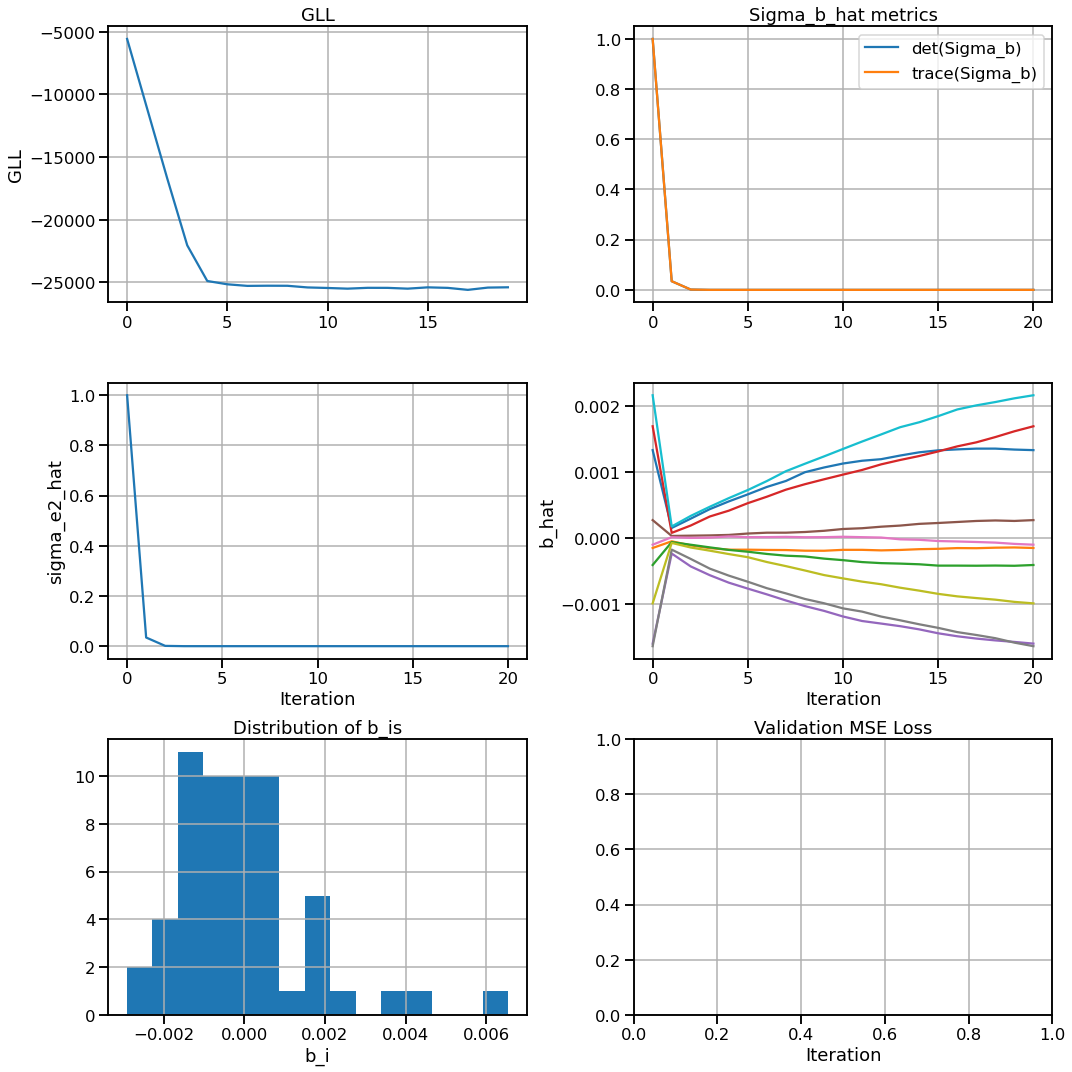

In [139]:
plot_merf_training_stats(mrf, num_clusters_to_plot=10)

### END